In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [3]:
def load_img():
    blank_img = np.zeros((600, 600))
    return blank_img

In [4]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [11]:
def H_corners3():
    img = np.zeros((600, 600))
    
    mask = np.zeros(img.shape[:2], np.uint8)
    mask[200:400, 200:400] = 255
    
    img = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)
    blurred_image1 = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)
    blurred_image2 = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)
    blurred_image3 = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)
    
    # Gaussian Blur
    blurred_image1 = cv.GaussianBlur(blurred_image1,(3,3),0)
    blurred_image2 = cv.GaussianBlur(blurred_image2,(5,5),0)
    blurred_image3 = cv.GaussianBlur(blurred_image3,(7,7),0)
    
    # Calculation of standard deviation 
    st_dev1 = 0.3*((1-1)*0.5-1)+0.8
    st_dev2 = 0.3*((3-1)*0.5-1)+0.8
    st_dev3 = 0.3*((5-1)*0.5-1)+0.8
    st_dev4 = 0.3*((7-1)*0.5-1)+0.8
    
    # Converting BGR to Grayscale
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    gray2 = cv.cvtColor(blurred_image1,cv.COLOR_BGR2GRAY)
    gray3 = cv.cvtColor(blurred_image2,cv.COLOR_BGR2GRAY)
    gray4 = cv.cvtColor(blurred_image3,cv.COLOR_BGR2GRAY)
    
    # Harris Corner
    dst = cv.cornerHarris(gray,2,3,0.04)
    dst2 = cv.cornerHarris(gray2,2,3,0.04)
    dst3 = cv.cornerHarris(gray3,2,3,0.04)
    dst4 = cv.cornerHarris(gray4,2,3,0.04)

    # Counting number of corner points
    corners = np.zeros(dst.shape)
    corners2 = np.zeros(dst2.shape)
    corners3 = np.zeros(dst3.shape)
    corners4 = np.zeros(dst4.shape)
    
    corners[dst > 0.01*dst.max()] = 255
    corners2[dst2 > 0.01*dst2.max()] = 255
    corners3[dst3 > 0.01*dst3.max()] = 255
    corners4[dst4 > 0.01*dst4.max()] = 255

    a = []
    a.append(np.argwhere(corners==255))
    a2 = []
    a2.append(np.argwhere(corners2==255))
    a3 = []
    a3.append(np.argwhere(corners3==255))
    a4 = []
    a4.append(np.argwhere(corners4==255))

    num_corners = len(a[0])
    num_corners2 = len(a2[0])
    num_corners3 = len(a3[0])
    num_corners4 = len(a4[0])
    
    # Actual coordinates
    x,y = np.nonzero(dst > 0.03 * dst.max())
    x2,y2 = np.nonzero(dst2 > 0.03 * dst2.max())
    x3,y3 = np.nonzero(dst3 > 0.03 * dst3.max())
    x4,y4 = np.nonzero(dst4 > 0.03 * dst4.max())
    
    x_round = np.round(x,-2)
    x2_round = np.round(x2,-2)
    x3_round = np.round(x3,-2)
    x4_round = np.round(x4,-2)
    y_round = np.round(y,-2)
    y2_round = np.round(y2,-2)
    y3_round = np.round(y3,-2)
    y4_round = np.round(y4,-2)
    
    # Difference between coordinates
    
    x1_dif = np.absolute(x - x_round)
    y1_dif = np.absolute(y - y_round)
    x2_dif = np.absolute(x2 - x2_round)
    y2_dif = np.absolute(y2 - y2_round)
    x3_dif = np.absolute(x3 - x3_round)
    y3_dif = np.absolute(y3 - y3_round)
    x4_dif = np.absolute(x4 - x4_round)
    y4_dif = np.absolute(y4 - y4_round)
    
    
    # Square Difference 
    
    x1_sq = np.square(x1_dif)
    y1_sq = np.square(y1_dif)
    x2_sq = np.square(x2_dif)
    y2_sq = np.square(y2_dif)
    x3_sq = np.square(x3_dif)
    y3_sq = np.square(y3_dif)
    x4_sq = np.square(x4_dif)
    y4_sq = np.square(y4_dif)

    # RMSE calculation
    sq_err1 = np.add(x1_sq, y1_sq)
    sq_err2 = np.add(x2_sq, y2_sq)
    sq_err3 = np.add(x3_sq, y3_sq)
    sq_err4 = np.add(x4_sq, y4_sq)

    RMSE_1 = np.sqrt(np.mean(sq_err1))
    RMSE_2 = np.sqrt(np.mean(sq_err2))
    RMSE_3 = np.sqrt(np.mean(sq_err3))
    RMSE_4 = np.sqrt(np.mean(sq_err4))
    

    # Result dilation
    dst = cv.dilate(dst,None)
    dst2 = cv.dilate(dst2,None)
    dst3 = cv.dilate(dst3,None)
    dst4 = cv.dilate(dst4,None)
    
    # Image Thresholding
    img[dst>0.03*dst.max()]=[0,0,255]
    blurred_image1[dst2>0.03*dst2.max()]=[0,0,255]
    blurred_image2[dst3>0.03*dst3.max()]=[0,0,255]
    blurred_image3[dst4>0.03*dst4.max()]=[0,0,255]

    # Plots for RMSE vs Std Dev
    fig = plt.figure(figsize=(14,18))
    ax1 = fig.add_subplot(3,1,1)
    ax1.set_title("RMSE vs Std Dev: 1st Image")
    plt.plot([st_dev1, st_dev2], [RMSE_1, RMSE_2])
    
    ax2 = fig.add_subplot(3,1,2)
    ax2.set_title("RMSE vs Std Dev: 2nd Image")
    plt.plot([st_dev2, st_dev3], [RMSE_2, RMSE_3])
    
    ax3 = fig.add_subplot(3,1,3)
    ax3.set_title("RMSE vs Std Dev: 3rd Image")
    plt.plot([st_dev3, st_dev4], [RMSE_3, RMSE_4])
    
    plt.show()

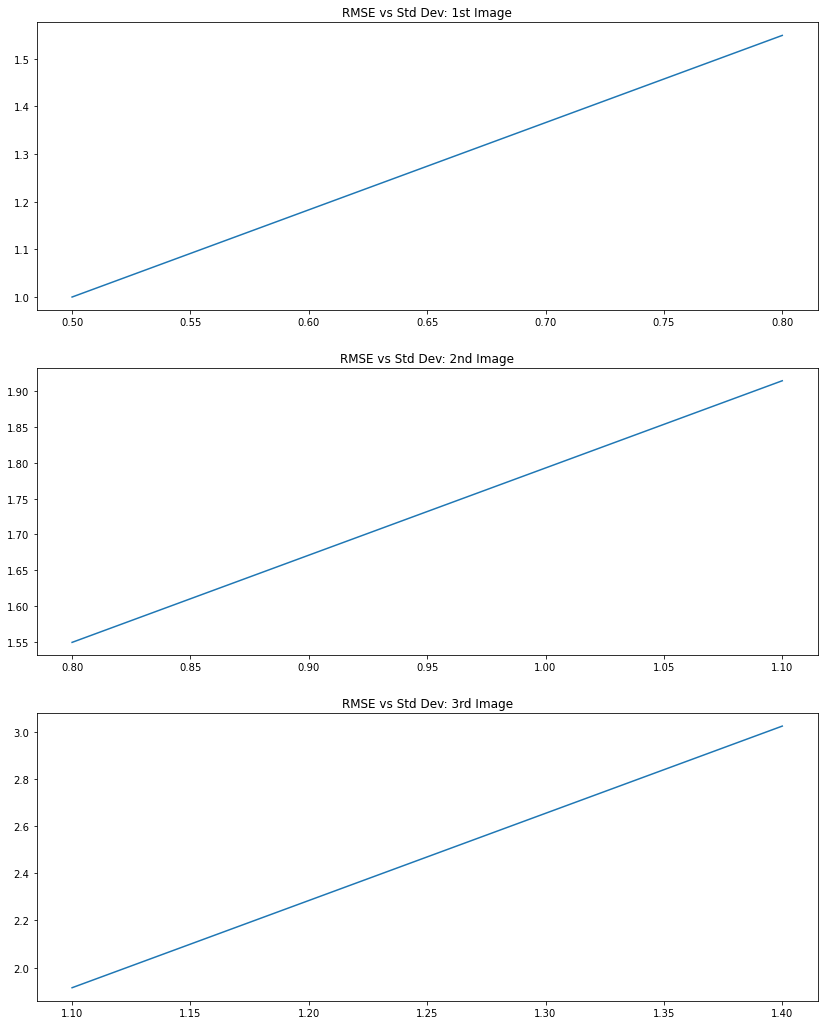

In [12]:
H_corners3()